## Supervised Learning
**(Kunskapskontroll 2)**

In [1]:
# Packages
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "Times New Roman"

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import SGDClassifier



# Importing the MNIST dataset

In [31]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.keys()
X, y = mnist['data'], mnist['target'].astype(np.uint8)


/Users/vedabojar/opt/anaconda3/lib/python3.9/site-packages/sklearn/datasets/_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [32]:
# The MNIST data is already split into training and dataset, but they 
# need to be instantieted
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

# EDA

In [33]:
print(f'Training Data: {X.shape}')
print(f'Label Data: {y.shape}')

Training Data: (70000, 784)
Label Data: (70000,)


In [34]:
# Checking for missing values
mnist_df =pd.DataFrame(mnist.data)

nan = mnist_df.isnull().sum()
print(nan[nan != 0])

Series([], dtype: int64)


Text(0.5, 1.0, 'A. Exempel av en MNIST bild med annoteringen 4')

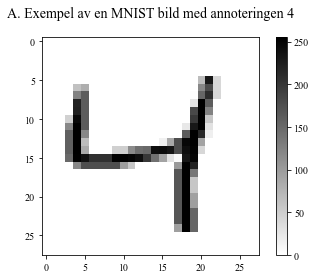

In [35]:
# Showing a single image
selected_image = 2
image = np.array(X[selected_image]) 
image_array = np.reshape(image, (28,28))

digit_img = plt.imshow(image_array, cmap=plt.cm.binary)
plt.colorbar(digit_img)
plt.title(
    f'A. Exempel av en MNIST bild med annoteringen {y[selected_image]}',
    fontsize = 14,
    pad = 20    
)

In [36]:
X_train_df = pd.DataFrame(X_train)
y_train_df = pd.DataFrame(y_train)
X_test_df = pd.DataFrame(X_test)
y_test_df = pd.DataFrame(y_test)

Text(0.5, 1.0, 'B. Fördelnging av siffror i MNIST databasen')

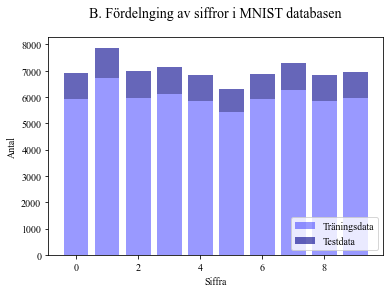

In [37]:
unique_train, counts_train = np.unique(y_train, return_counts=True)
unique_test, counts_test = np.unique(y_test, return_counts=True)

plt.bar(unique_train, counts_train, color='blue', alpha=0.4)
plt.bar(unique_test, counts_test, bottom=counts_train, color='darkblue', alpha=0.6)

plt.xlabel('Siffra')
plt.ylabel('Antal')
plt.legend(['Träningsdata', 'Testdata'], fontsize=10, loc='lower right')
plt.title('B. Fördelnging av siffror i MNIST databasen', fontsize=14, pad=20)

In [38]:
X_train_df.describe()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
count,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.0000,60000.0,60000.0,60000.0,60000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.200433,0.088867,0.045633,0.019283,0.015117,0.0020,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.042472,3.956189,2.839845,1.686770,1.678283,0.3466,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.000000,254.000000,62.0000,0.0,0.0,0.0,0.0


# Preprocessing

In [39]:
# Normalising the data
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

Text(0.5, 1.0, 'A. Exempel av en MNIST bild med annoteringen 4')

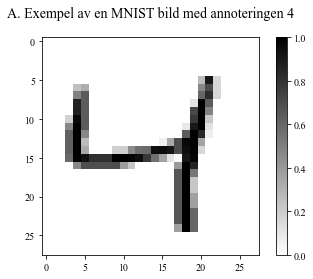

In [40]:
# Showing a single image with normalised pixel colorscale 0-1
selected_image = 2
image = np.array(X_train[selected_image]) 
image_array = np.reshape(image, (28,28))

digit_img = plt.imshow(image_array, cmap=plt.cm.binary)
plt.colorbar(digit_img)
plt.title(
    f'A. Exempel av en MNIST bild med annoteringen {y[selected_image]}',
    fontsize = 14,
    pad = 20    
)

In [41]:
# Flattening the images
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

# Modeller

The MNIST dataset is already preprocessed and can be directly used to input to a ML model. Training a model usually requires the some common steps, therefore the method for each model training can be summarised by:
1. Any necessary data transformation
2. Training the model
3. Hyperparameter tuning
4. Improved model
5. Model evaluation 
6. Evaluation summary

## 1. Binär Klassificering med SGDClasssifier

The simplest classification problem is to identify a single digit, e.g. the model will distinguish if the image is a number four or not. This means that instead of having 10 classes (0-9), they will be reduced to only two - '4' and 'not 4'. Same goes for the label data, where 
'4' will be labeled with a '1' and all 'not 4' images with '0'.

### Data adjustment

In [43]:
# New labels
y_train_4 = (y_train == 4)
y_test_4 = (y_test == 4)

In [44]:
print(y_train_4)
print(y_train)

[False False  True ... False False False]
[5 0 4 ... 5 6 8]


### Traing the model

In [45]:
# Fitting the classifier
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42) 
sgd_clf.fit(X_train, y_train_4)

SGDClassifier(random_state=42)

In [46]:
# Testing the model
sgd_clf.predict([X[2]])

array([ True])

### Hyperparameter Tuning

In [47]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

# Definiera hyperparametrar
param_grid = {
    'alpha': [0.0001, 0.001, 0.01],
    'penalty': ['l1', 'l2', 'elasticnet'],
    'max_iter': [1000, 2000, 3000]
}

grid_search = GridSearchCV(
    sgd_clf, 
    param_grid, 
    cv=3,
    scoring='accuracy',
    return_train_score=True
)

sgd_gs = grid_search.fit(X_train, y_train_4)

### Imporved model

In [48]:
# Best estimator
sgd_gs.best_estimator_

SGDClassifier(alpha=0.001, penalty='elasticnet', random_state=42)

In [49]:
# Fitting the mproved SGDClassifier
 
sgd_clf_im = SGDClassifier(alpha=0.001, penalty='elasticnet', random_state=42) 
sgd_clf_im.fit(X_train, y_train_4)

SGDClassifier(alpha=0.001, penalty='elasticnet', random_state=42)

### Evaluating the model

/var/folders/g3/93t5n84n5mx21zt5zyc8rjzc0000gn/T/ipykernel_81636/2338046766.py:35: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


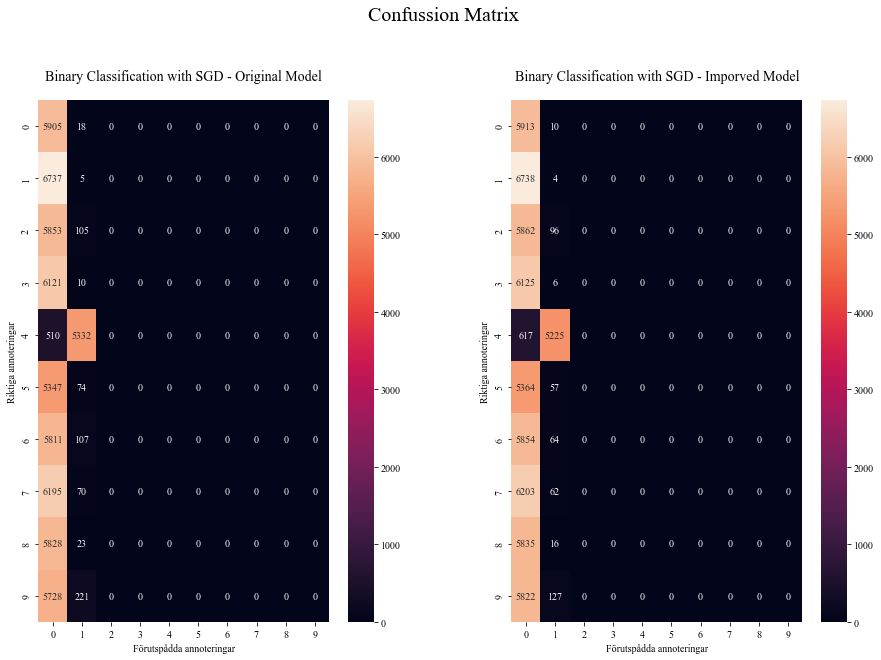

In [50]:
# Confusion matrix

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
import seaborn as sns

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_4)
y_train_pred_im = cross_val_predict(sgd_clf_im, X_train, y_train_4)

confusion_1 = confusion_matrix(y_train, y_train_pred)
confusion_2 = confusion_matrix(y_train, y_train_pred_im)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 10))
fig.suptitle('Confussion Matrix', fontsize=20)

sns.heatmap(confusion_1, annot=True, fmt='g', ax=axes[0])
axes[0].set_xlabel('Förutspådda annoteringar')
axes[0].set_ylabel('Riktiga annoteringar')
axes[0].set_title(
    'Binary Classification with SGD - Original Model', 
    fontsize=14,
    pad=20
)

sns.heatmap(confusion_2, annot=True, fmt='g', ax=axes[1])
axes[1].set_xlabel('Förutspådda annoteringar')
axes[1].set_ylabel('Riktiga annoteringar')
axes[1].set_title(
    'Binary Classification with SGD - Imporved Model', 
    fontsize=14,
    pad=20
)

fig.subplots_adjust(top=0.85, wspace=0.3)
fig.show()

In [51]:
# Cross-validation

from sklearn.model_selection import cross_val_score

# Mean cross-validation score
cv_sgd_og = np.mean(cross_val_score(sgd_clf, X_train, y_train_4, cv=3, scoring="accuracy"))
cv_sgd_im = np.mean(cross_val_score(sgd_clf_im, X_train, y_train_4, cv=3, scoring="accuracy"))

In [52]:
# Precision score

from sklearn.metrics import precision_score, recall_score

sgd_precision_og = precision_score(y_train_4, y_train_pred)
sgd_precision_im = precision_score(y_train_4, y_train_pred_im)

In [53]:
# Recall = The percent of positive class that we predict correctly.

sgd_recall_og = recall_score(y_train_4, y_train_pred)
sgd_recall_im = recall_score(y_train_4, y_train_pred_im)

In [54]:
# F1 score

from sklearn.metrics import f1_score

sgd_f1_og = f1_score(y_train_4, y_train_pred)
sgd_f1_im = f1_score(y_train_4, y_train_pred_im)

In [60]:
# Summary Table
summary_sgd = {
    'Modellanpassning': ['Ja', 'Nej'],
    'Cross-valizdation': [cv_sgd_og, cv_sgd_og],
    'Precision score': [sgd_precision_og, sgd_precision_im],
    'Recall score': [sgd_recall_og, sgd_recall_im],
    'F1 score': [sgd_f1_og, sgd_f1_im],
}

df = pd.DataFrame(summary_sgd)
print('----------------------------------------------------------------------------------')
print('                           Summary of Model Evaluation                            ')
print('----------------------------------------------------------------------------------')
print(df)

----------------------------------------------------------------------------------
                           Summary of Model Evaluation                            
----------------------------------------------------------------------------------
  Modellanpassning  Cross-valizdation  Precision score  Recall score  F1 score
0               Ja           0.980117         0.893881      0.912701  0.903193
1              Nej           0.980117         0.922005      0.894385  0.907985


In [1]:
from sklearn.metrics import precision_recall_curve

y_scores = cross_val_predict(sgd_clf, X_train, y_train_4, cv=3, method="decision_function")
precision, recall, thresholds = precision_recall_curve(y_train_4, y_scores)

plt.figure(figsize=(15, 10))                                                               
plt.plot(recall, color='green', alpha=0.5, linewidth=5)   
plt.plot(precision, color='magenta', alpha=0.5, linewidth=5)

plt.xlabel('Recall', fontsize=14)
plt.ylabel('Precision', fontsize=14)
plt.title('Precision-Recall Trade-Off Graf', fontsize=20, pad=20)
plt.legend(['Recall', 'Precision'], fontsize=20, loc='center left')
plt.show()

NameError: name 'cross_val_predict' is not defined

## 2. SVM 

The SVM modell aims to find a hyperplane that best separates the data into different classses. 

### Training the model

In [61]:
from sklearn.svm import SVC

svm_clf = SVC(gamma="auto", random_state=42)
svm_clf.fit(X_train[:1000], y_train[:1000])

SVC(gamma='auto', random_state=42)

### Hyperparameter Tuning

In [77]:
svm_param = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto', 'scale']
}

svm_grid_search = GridSearchCV(
    svm_clf, 
    svm_param,
    cv=3,
    n_jobs=-1,
)

svm_gs = svm_grid_search.fit(X_train[:1000], y_train[:1000])

### Improved model

In [78]:
# Best estimator
svm_grid_search.best_estimator_

SVC(C=10, random_state=42)

In [79]:
# Imporved SVM Classifier
svm_clf_im = SVC(C=10, random_state=42)
svm_clf_im.fit(X_train, y_train)

SVC(C=10, random_state=42)

### Evaluating the model

/var/folders/g3/93t5n84n5mx21zt5zyc8rjzc0000gn/T/ipykernel_81636/3643267694.py:32: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


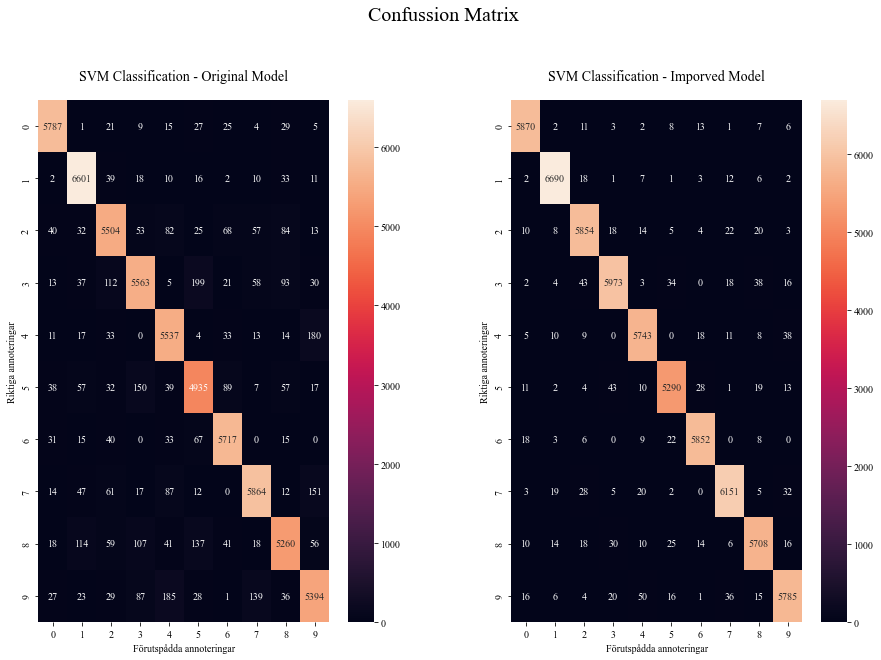

In [80]:
# Confusion matrix

svm_y_train_pred = cross_val_predict(svm_clf, X_train, y_train)
svm_y_train_pred_im = cross_val_predict(svm_clf_im, X_train, y_train)


confusion_1 = confusion_matrix(y_train, svm_y_train_pred)
confusion_2 = confusion_matrix(y_train, svm_y_train_pred_im)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 10))
fig.suptitle('Confussion Matrix', fontsize=20)

sns.heatmap(confusion_1, annot=True, fmt='g', ax=axes[0])
axes[0].set_xlabel('Förutspådda annoteringar')
axes[0].set_ylabel('Riktiga annoteringar')
axes[0].set_title(
    'SVM Classification - Original Model', 
    fontsize=14,
    pad=20
)

sns.heatmap(confusion_2, annot=True, fmt='g', ax=axes[1])
axes[1].set_xlabel('Förutspådda annoteringar')
axes[1].set_ylabel('Riktiga annoteringar')
axes[1].set_title(
    'SVM Classification - Imporved Model', 
    fontsize=14,
    pad=20
)

fig.subplots_adjust(top=0.85, wspace=0.3)
fig.show()

In [82]:
# Cross-validation

from sklearn.model_selection import cross_val_score

# Mean cross-validation score
svm_cv_og = np.mean(cross_val_score(svm_clf, X_train, y_train, cv=3, scoring="accuracy"))
svm_cv_im = np.mean(cross_val_score(svm_clf_im, X_train, y_train, cv=3, scoring="accuracy"))

In [83]:
# Precision score-

from sklearn.metrics import precision_score, recall_score

svm_precision_og = precision_score(y_train, svm_y_train_pred, average='micro')
svm_precision_im = precision_score(y_train, svm_y_train_pred_im, average='micro')

In [84]:
# Recall = The percent of positive class that we predict correctly.

svm_recall_og = recall_score(y_train, svm_y_train_pred, average='micro')
svm_recall_im = recall_score(y_train, svm_y_train_pred_im, average='micro')

In [85]:
# F1 score

from sklearn.metrics import f1_score

svm_f1_og = f1_score(y_train, svm_y_train_pred, average='micro')
svm_f1_im = f1_score(y_train, svm_y_train_pred_im, average='micro')

In [86]:
# Summary Table
summary_sgd = {
    'Modellanpassning': ['Ja', 'Nej'], 
    'Cross-valizdation': [svm_cv_og, svm_cv_im],
    'Precision score': [svm_precision_og, svm_precision_im],
    'Recall score': [svm_recall_og, svm_recall_im],
    'F1 score': [svm_f1_og, svm_f1_im],
}

df = pd.DataFrame(summary_sgd)
print(df)

  Modellanpassning  Cross-valizdation  Precision score  Recall score  F1 score
0               Ja            0.93425         0.936033      0.936033  0.936033
1              Nej            0.98020         0.981933      0.981933  0.981933


## 3. Random Forest 

### Training the model

In [87]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
y_probas_forest = cross_val_predict(
    forest_clf, 
    X_train, 
    y_train, 
    cv=3,
    method="predict_proba"
)

In [88]:
forest_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

### Hyperparameter Tuning

In [89]:
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

grid_search_forest = GridSearchCV(
    forest_clf, 
    param_grid, 
    cv=3,
    return_train_score=True
)

forest_gs = grid_search_forest.fit(X_train, y_train)

### Improved model

In [90]:
# Best estimator
grid_search_forest.best_estimator_

RandomForestClassifier(n_estimators=200, random_state=42)

In [91]:
# Improved Random Forest Model
forest_clf_im = RandomForestClassifier(n_estimators=200, random_state=42)
forest_clf_im.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

### Evaluating the model

/var/folders/g3/93t5n84n5mx21zt5zyc8rjzc0000gn/T/ipykernel_81636/1288624368.py:32: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


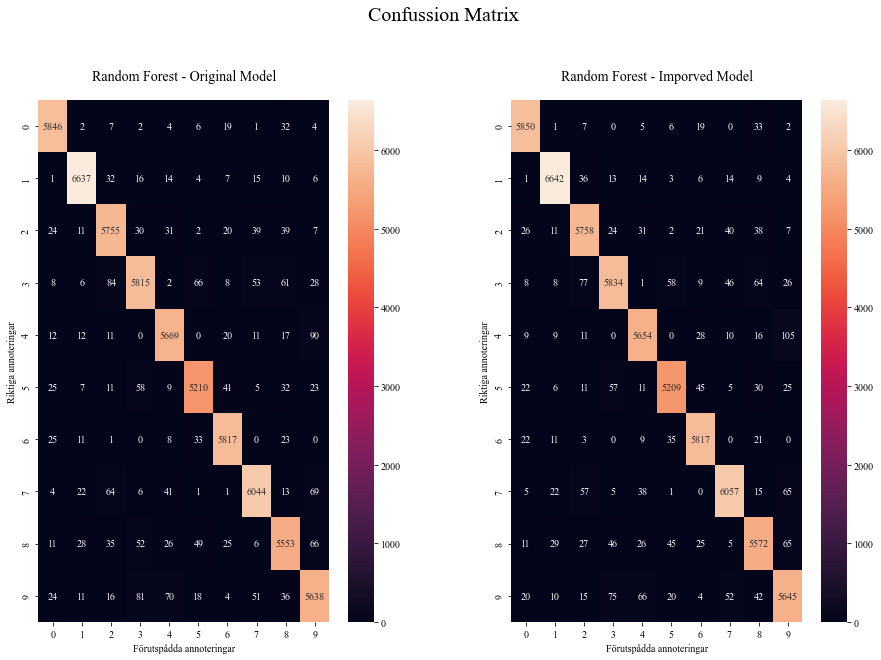

In [94]:
# Confusion matrix

forest_y_train_pred = cross_val_predict(forest_clf, X_train, y_train)
forest_y_train_pred_im = cross_val_predict(forest_clf_im, X_train, y_train)


confusion_1 = confusion_matrix(y_train, forest_y_train_pred)
confusion_2 = confusion_matrix(y_train, forest_y_train_pred_im)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 10))
fig.suptitle('Confussion Matrix', fontsize=20)

sns.heatmap(confusion_1, annot=True, fmt='g', ax=axes[0])
axes[0].set_xlabel('Förutspådda annoteringar')
axes[0].set_ylabel('Riktiga annoteringar')
axes[0].set_title(
    'Random Forest - Original Model', 
    fontsize=14,
    pad=20
)

sns.heatmap(confusion_2, annot=True, fmt='g', ax=axes[1])
axes[1].set_xlabel('Förutspådda annoteringar')
axes[1].set_ylabel('Riktiga annoteringar')
axes[1].set_title(
    'Random Forest - Imporved Model', 
    fontsize=14,
    pad=20
)

fig.subplots_adjust(top=0.85, wspace=0.3)
fig.show()

In [95]:
# Cross-validation

from sklearn.model_selection import cross_val_score

# Mean cross-validation score
cv_forest_og = np.mean(cross_val_score(forest_clf, X_train, y_train, cv=3, scoring="accuracy"))
cv_forest_im = np.mean(cross_val_score(forest_clf_im, X_train, y_train, cv=3, scoring="accuracy"))

In [96]:
# Precision score

from sklearn.metrics import precision_score, recall_score

forest_precision_og = precision_score(y_train, forest_y_train_pred, average='micro')
forest_precision_im = precision_score(y_train, forest_y_train_pred_im, average='micro')

In [97]:
# Recall = The percent of positive class that we predict correctly.

forest_recall_og = recall_score(y_train, forest_y_train_pred, average='micro')
forest_recall_im = recall_score(y_train, forest_y_train_pred_im, average='micro')

In [98]:
# F1 score

from sklearn.metrics import f1_score

forest_f1_og = f1_score(y_train, forest_y_train_pred, average='micro')
forest_f1_im = f1_score(y_train, forest_y_train_pred_im, average='micro')

In [99]:
# Summary Table
summary_sgd = {
    'Modellanpassning': ['Ja', 'Nej'],
    'Cross-valizdation': [cv_forest_og, cv_forest_im],
    'Precision score': [forest_precision_og, forest_precision_im],
    'Recall score': [forest_recall_og, forest_recall_im],
    'F1 score': [forest_f1_og, forest_f1_im],
}

df = pd.DataFrame(summary_sgd)
print(df)

  Modellanpassning  Cross-valizdation  Precision score  Recall score  F1 score
0               Ja           0.964600           0.9664        0.9664    0.9664
1              Nej           0.965533           0.9673        0.9673    0.9673
